In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import math

In [ ]:
gsheet = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSFxfviSPuldxr8mHecUKmrtknkH94INGSdPeUFHgcaj1ogViJ7XpCPARppYyWwP9yLqCNWE-JuTomH/pub?gid=0&single=true&output=csv"
data = pd.read_csv(gsheet)
i = data['Incidente (gr)'].to_numpy()*2*np.pi/360
t = data['transmitido (gr)'].to_numpy()*2*np.pi/360
t_err = data['e_trans (gr)'].to_numpy()*2*np.pi/360

In [ ]:
sen_i = np.sin(i)
sen_t = np.sin(t)
sen_t_err = np.cos(t)*t_err

In [ ]:
def lineal(x, a, b):
  return a*x+ b

Text(0.5, 1.0, 'Agua')

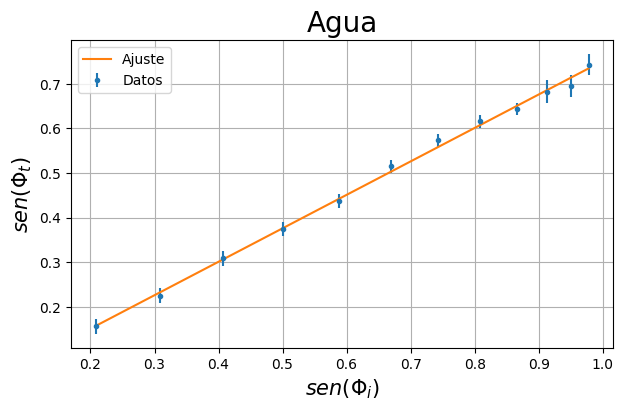

In [ ]:
p, cov = scipy.optimize.curve_fit(lineal, sen_i, sen_t)#, sigma=sen_t_err, absolute_sigma=True)
err = np.sqrt(np.diag(cov))
y_fit = lineal(sen_i, p[0], p[1])
plt.figure(figsize=(7,4))
plt.errorbar(sen_i, sen_t, yerr=sen_t_err, fmt=".", label="Datos")
plt.plot(sen_i, y_fit, "-", label = "Ajuste")
plt.xlabel("$sen(\Phi_i)$", fontsize=15), plt.ylabel("$sen(\Phi_t)$", fontsize=15)
plt.grid(), plt.legend()
plt.title("Agua", fontsize=20)

(0.0015377726116474477, 1.3343070116404907, 0.02125999356278935)

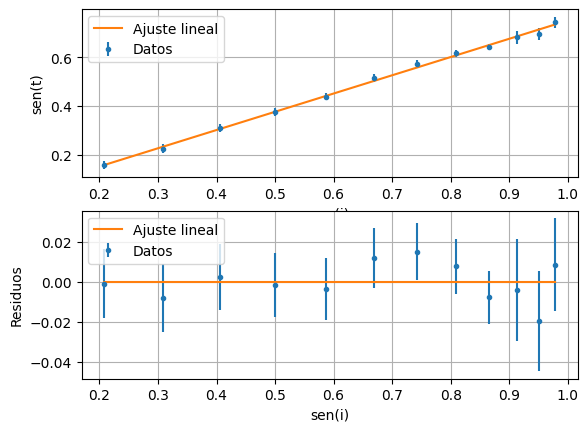

In [ ]:
p, cov = scipy.optimize.curve_fit(lineal, sen_i, sen_t)#, sigma=sen_t_err, absolute_sigma=True)
err = np.sqrt(np.diag(cov))
y_fit = lineal(sen_i, p[0], p[1])
plt.figure()
ax1 = plt.subplot(2,1,1)
plt.errorbar(sen_i, sen_t, yerr=sen_t_err, fmt=".", label="Datos")
plt.plot(sen_i, y_fit, "-", label = "Ajuste lineal")
plt.xlabel("sen(i)"), plt.ylabel("sen(t)")
plt.grid(), plt.legend()

plt.subplot(2,1,2, sharex=ax1)
plt.errorbar(sen_i, sen_t-y_fit, yerr=sen_t_err, fmt='.', label="Datos")
plt.plot(sen_i, y_fit*0, "-", label = "Ajuste lineal")
plt.xlabel("sen(i)"), plt.ylabel("Residuos")
plt.grid(), plt.legend()

p[1], 1/p[0], err[0]/(p[0]**2)

In [ ]:
#Metricas de bondad
from scipy.stats import pearsonr
rp = pearsonr(sen_i, sen_t)[0]
chi2 = scipy.stats.chisquare(f_obs=sen_t, f_exp=y_fit)
corr_matrix = np.corrcoef(sen_t, y_fit)
corr = corr_matrix[0,1]
R_sq = corr**2

rp, chi2, R_sq

(0.998733047197395,
 Power_divergenceResult(statistic=0.001907058268081151, pvalue=1.0),
 0.9974676995641942)

In [ ]:
def snell(i, n):
  asin = []
  for j in range(len(i)):
    asin.append(math.asin(np.sin(i[j])/n))
  return asin

(array([1.32665184]), array([0.01234708]))

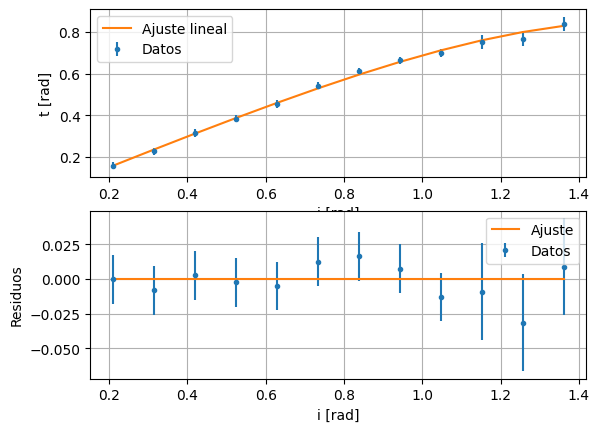

In [ ]:
p, cov = scipy.optimize.curve_fit(snell, i, t, sigma=t_err, absolute_sigma=True)
err = np.sqrt(np.diag(cov))
y_fit = snell(i, p[0])
plt.figure()
ax1 = plt.subplot(2,1,1)
plt.errorbar(i, t, yerr=t_err, fmt=".", label="Datos")
plt.plot(i, y_fit, "-", label = "Ajuste lineal")
plt.xlabel("i [rad]"), plt.ylabel("t [rad]")
plt.grid(), plt.legend()

plt.subplot(2,1,2, sharex=ax1)
plt.errorbar(i, t-y_fit, yerr=t_err, fmt='.', label="Datos")
plt.plot(i, np.zeros(len(i)), "-", label = "Ajuste")
plt.xlabel("i [rad]"), plt.ylabel("Residuos")
plt.grid(), plt.legend()

p, err

In [ ]:
#Metricas de bondad
from scipy.stats import pearsonr
rp = pearsonr(i, t)[0]
#chi2 = scipy.stats.chisquare(f_obs=t, f_exp=y_fit)
corr_matrix = np.corrcoef(t, y_fit)
corr = corr_matrix[0,1]
R_sq = corr**2

rp, R_sq

(0.990408758198575, 0.9967705387761404)

Text(0.5, 1.0, 'Agua')

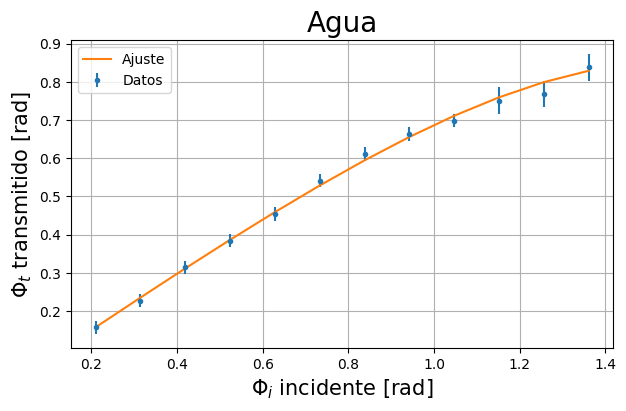

In [ ]:
p, cov = scipy.optimize.curve_fit(snell, i, t, sigma=t_err, absolute_sigma=True)
err = np.sqrt(np.diag(cov))
y_fit = snell(i, p[0])
plt.figure(figsize=(7,4))
plt.errorbar(i, t, yerr=t_err, fmt=".", label="Datos")
plt.plot(i, y_fit, "-", label = "Ajuste")
plt.xlabel("$\Phi_i$ incidente [rad]", fontsize=15), plt.ylabel("$\Phi_t$ transmitido [rad]", fontsize=15)
plt.grid(), plt.legend()
plt.title("Agua", fontsize=20)